# Rugby Data Experiment

In [47]:
# To make markdown from this file
# jupyter nbconvert --to markdown RugbyExperiment.ipynb --output README.md

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

pd.options.mode.chained_assignment = None  # default='warn'

In [49]:
rugby = pd.read_csv("RugbyData.csv")
rugby.head(5)

,Team1,Score1,Score2,Team2,Year
0,Ireland,29,7,Wales,2022
1,Scotland,20,17,England,2022
2,France,37,10,Italy,2022
3,Wales,20,17,Scotland,2022
4,France,30,24,Ireland,2022


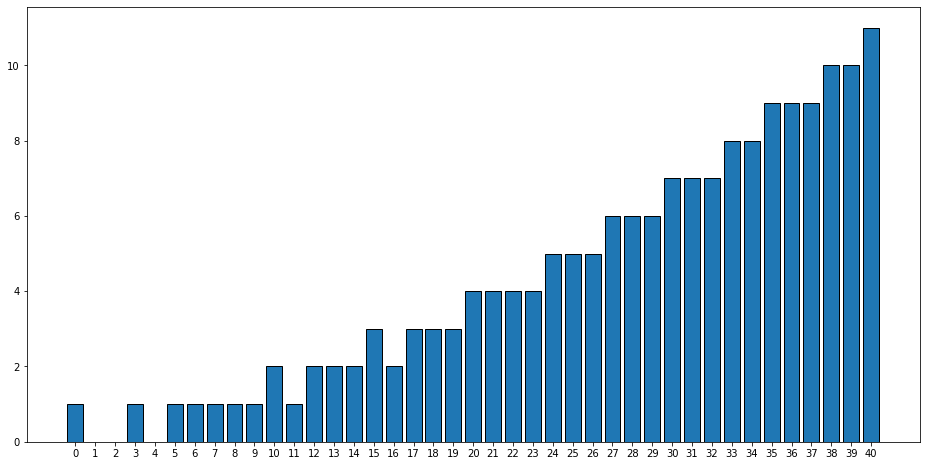

In [50]:
# Number of ways to reach score n.
n = 40

# table[i] will store count of solutions for value i.
table = [0 for i in range(n+1)]

# Base case (If given value is 0)
table[0] = 1

# One by one consider given 3 moves and update the 
# table[] values after the index greater than or equal 
# to the value of the picked move.
for i in range(3, n+1):
    table[i] += table[i-3]
for i in range(5, n+1):
    table[i] += table[i-5]
for i in range(7, n+1):
    table[i] += table[i-7]


d={i:x for i,x in enumerate(table)}
score_possibilities = plt.figure(figsize=(16,8))
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.show()

## All_Scores is a series made by appending Score1 and Score2 columns

In [51]:
All_Scores = rugby['Score1'].append(rugby['Score2'])

C:\Users\CAMBM3\AppData\Local\Temp\ipykernel_28164\3103183966.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_Scores = rugby['Score1'].append(rugby['Score2'])


## Countplot for scores

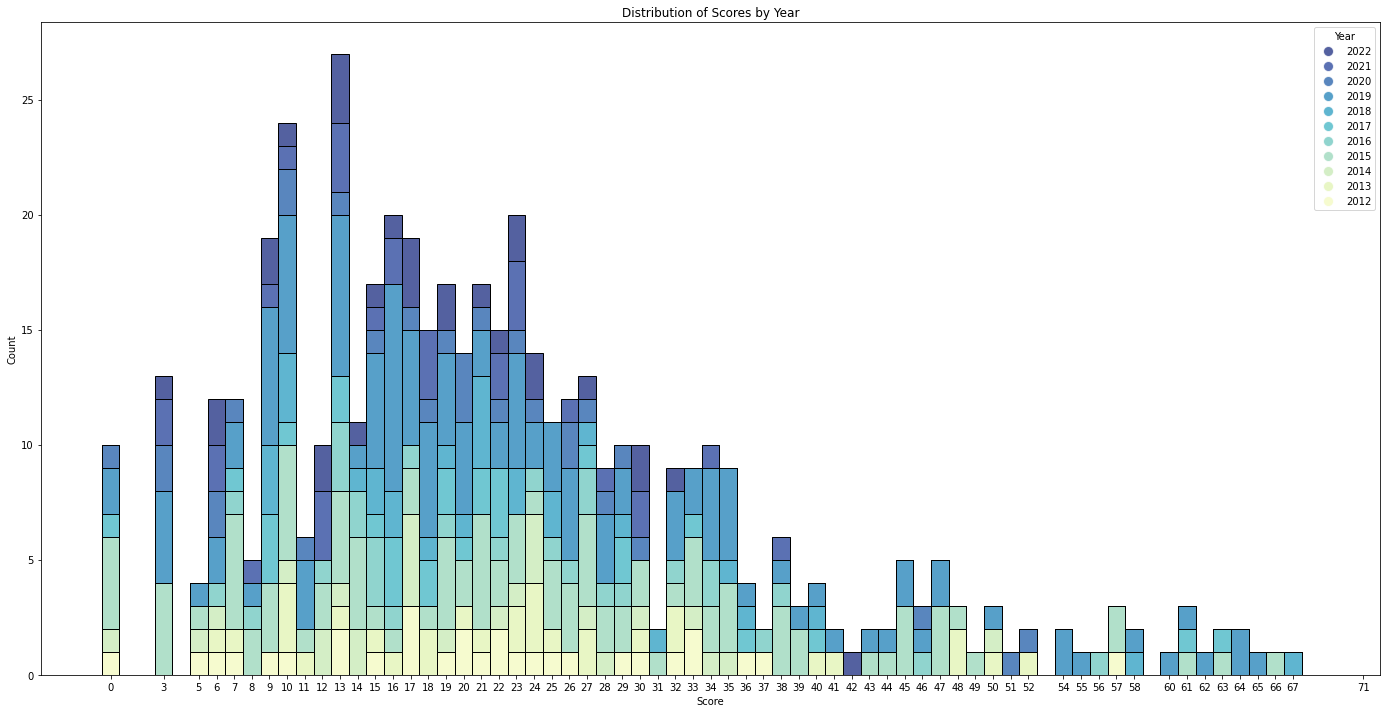

In [147]:
# Convert the data to a DataFrame
rugby = pd.read_csv("RugbyData.csv")

df = rugby.melt(id_vars=['Year'], value_vars=['Score1', 'Score2'], value_name='Score')
df.drop(columns=['variable'], inplace=True)

# Creating a custom color palette
year_palette = sns.color_palette("YlGnBu", n_colors=df["Year"].nunique())[::-1]

# Creating a distplot using seaborn
plt.figure(figsize=(24, 12))
hist = sns.histplot(data=df, bins=np.arange(70)-0.5, x="Score", hue="Year", multiple="stack", palette=year_palette)

# Getting the color information from the distplot legend
legend_colors = [patch.get_facecolor() for patch in hist.legend_.legendHandles]

# Creating a custom legend
legend_labels = df["Year"].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                  markerfacecolor=color, markersize=10)
                  for label, color in zip(legend_labels, legend_colors)]
plt.legend(handles=legend_handles, title="Year")


plt.title("Distribution of Scores by Year")
plt.xlabel("Score")
plt.ylabel("Count")

# Adding axis ticks for each score value
plt.xticks(df["Score"].unique())
plt.show()



C:\Users\CAMBM3\Desktop\Projects\Data_Science\data-sci-python-course-wit\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


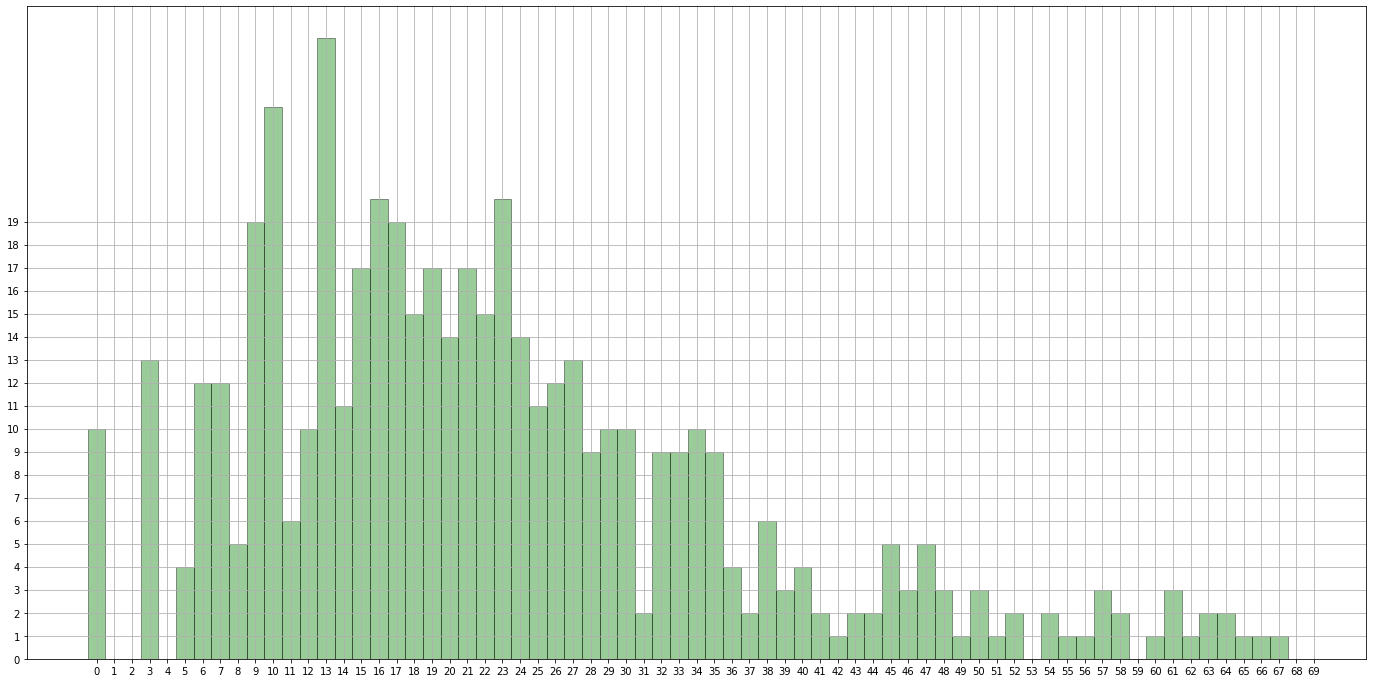

In [111]:

score_data_countplot = plt.figure(figsize=(24,12))
ax = sns.distplot(All_Scores, bins=np.arange(70)-0.5, kde=False, color = 'g')
ax.set(xticks=range(0,70))
ax.set(yticks=range(0,20))
ax.grid()

In [53]:
most_freq = All_Scores.value_counts()
for score, count in most_freq.head(10).iteritems():
    print("{} has occurred {} times".format(score, count))

13 has occurred 27 times
10 has occurred 24 times
16 has occurred 20 times
23 has occurred 20 times
9 has occurred 19 times
17 has occurred 19 times
15 has occurred 17 times
21 has occurred 17 times
19 has occurred 17 times
22 has occurred 15 times


#### Common scores seen in the ranges 9-10, 12-13, 15-23, 26-30

## Team Specifics

## Function to return match history of 2 teams

In [54]:
def match_history(country1, country2):
    games1 = rugby[(rugby['Team1']==country1) & (rugby['Team2']==country2)]
    games2 = rugby[(rugby['Team2']==country1) & (rugby['Team1']==country2)]
    c = games2.columns
    games2[[c[0], c[3]]] = games2[[c[3], c[0]]]
    games2[[c[1], c[2]]] = games2[[c[2], c[1]]]
    games = games1.append(games2)
    games.sort_index(inplace=True)
    return games

In [65]:
mh = match_history("France", "New Zealand")
mh

C:\Users\CAMBM3\AppData\Local\Temp\ipykernel_28164\246494248.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  games = games1.append(games2)


,Team1,Score1,Score2,Team2,Year


In [66]:
print("Mean scores are {} {}".format(mh['Score1'].mean(), mh['Score2'].mean()))

Mean scores are nan nan


#### Here we will create a regression plot of the scores from a pair of teams' match history

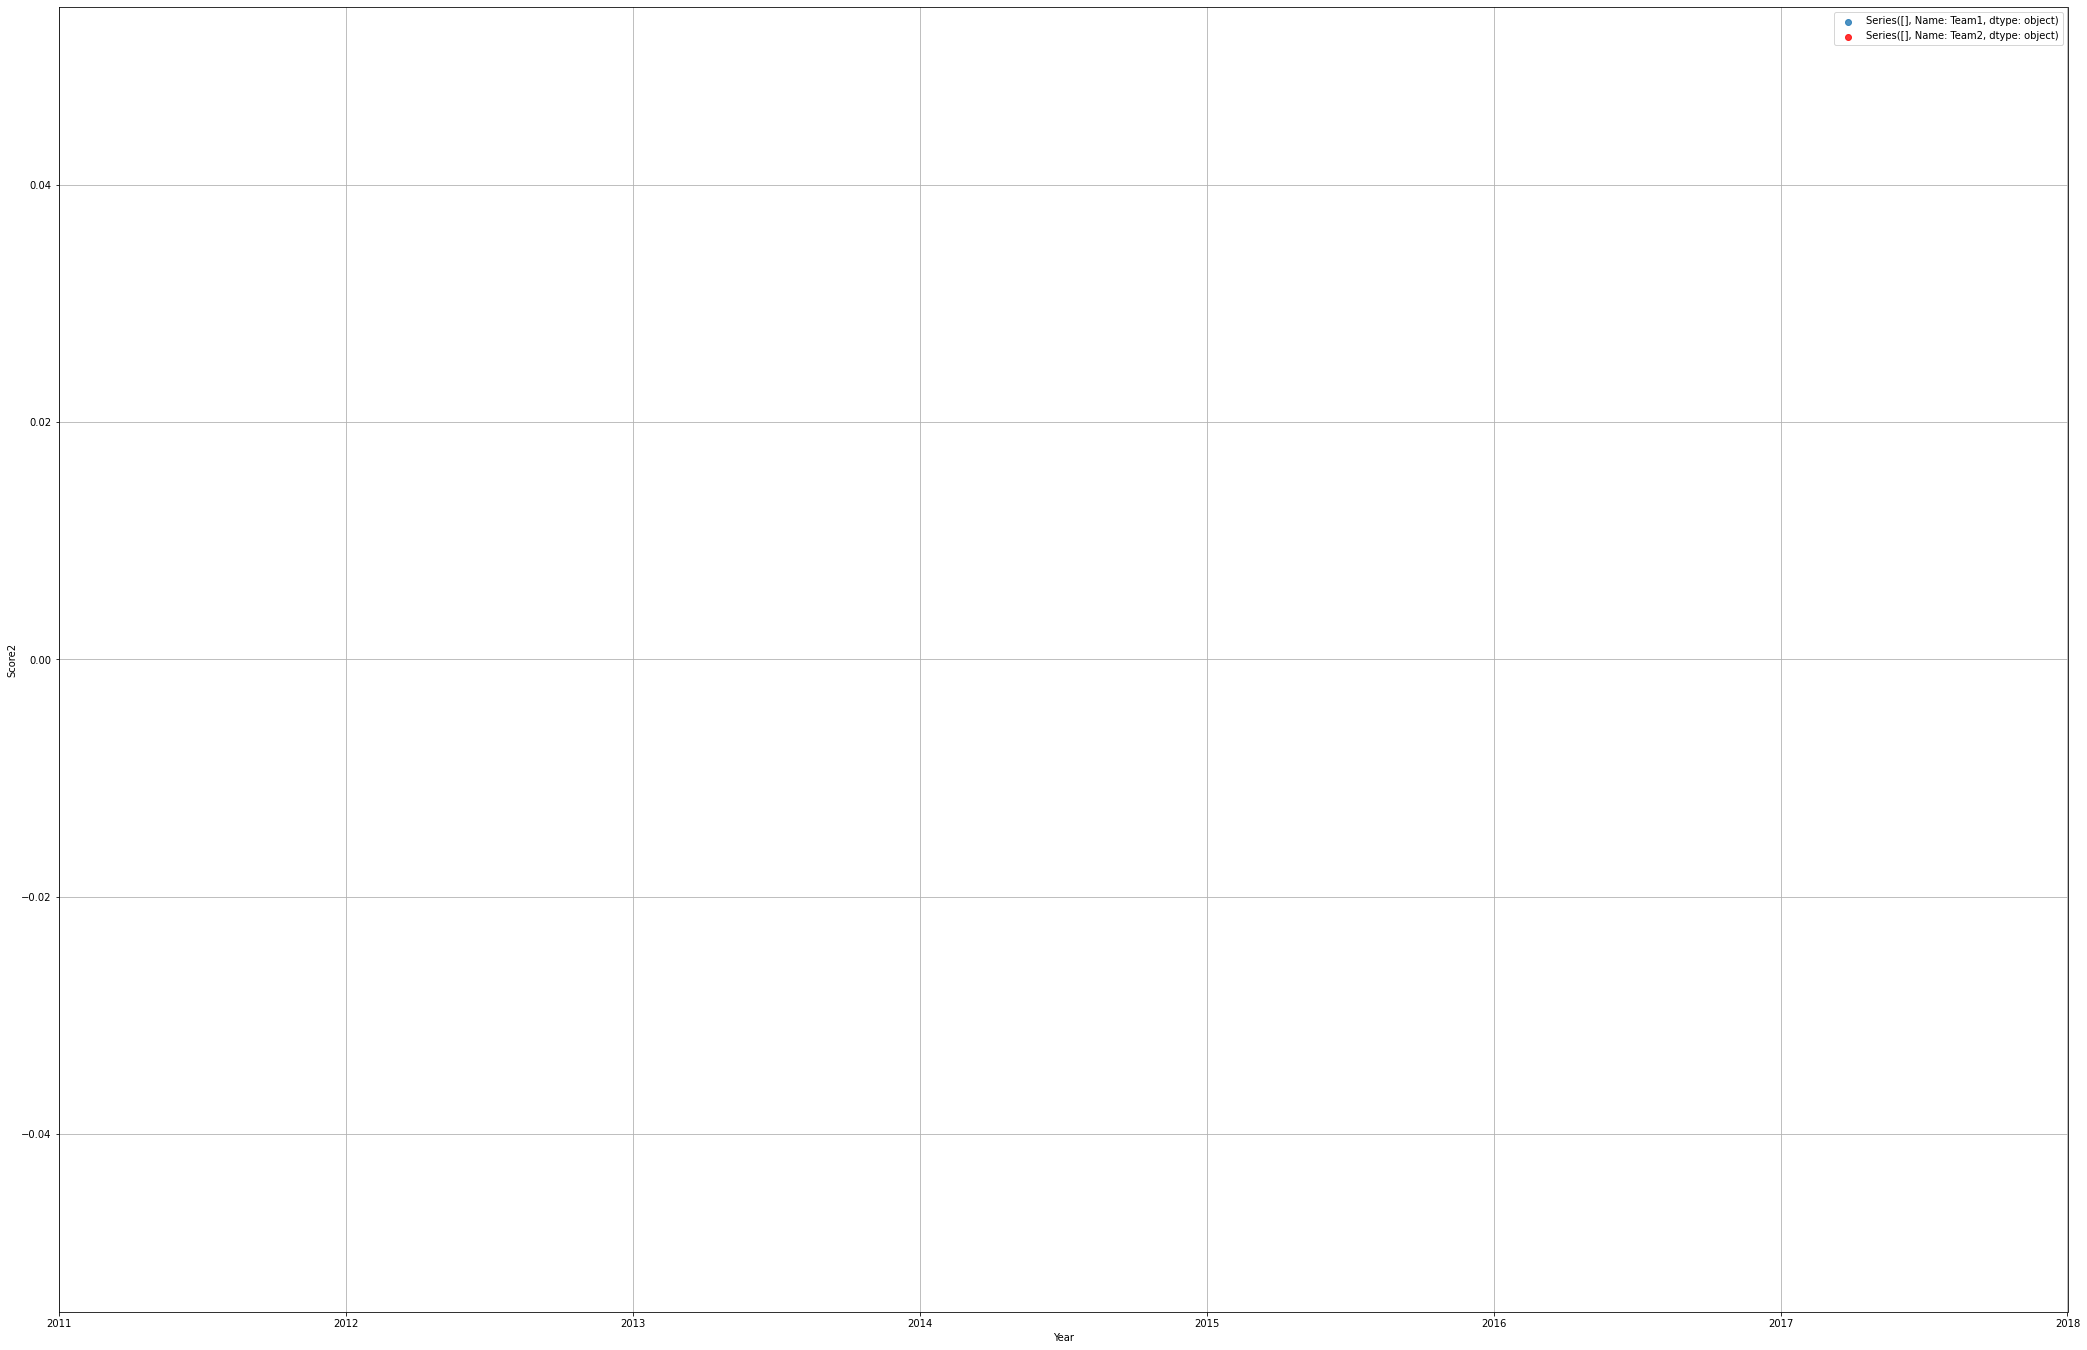

In [67]:
fig, ax = plt.subplots(figsize=(36,24))
p = sns.regplot(x='Year', y='Score1', data=mh, ax=ax, label=mh['Team1'])
p2 = sns.regplot(x='Year', y='Score2', data=mh, ax=ax, label=mh['Team2'], color='r')
plt.xlim(2011, 2018)
ax.grid()
ax.legend(loc="best")